<a href="https://colab.research.google.com/github/chuscigales/streamlit_palladium/blob/main/trained_Europa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import datetime as dt
import sklearn
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = '/content/drive/MyDrive/TFM - Palladium/PROYECTO LIMPIO/europa_sin_covid.csv'
df_data = pd.read_csv(data, sep=",")
df_data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID_HOTEL,COD_CENTRAL,LOCALIZADOR,LLEGADA,SALIDA,NOCHES,REGIMEN,...,ID_VIAJACON,VIAJACON,CUPO,TIPODOCUMENTO,Price_Comercializadora,Price,ESTADO_RESERVA,CANELACION,TARGET,ADR
0,0,5871,16017,94,EUR,94CJ2006782M,2021-09-09,2021-09-11,2,All Inclusive,...,0,NaN,CUPO CLIENTE,DNI,584.92,602.52,0,3,PAREJAS,301.260
1,1,5872,16018,94,EUR,297200290J-STM-CH,2021-10-20,2021-10-23,3,All Inclusive,...,0,NaN,CUPO CLIENTE,DNI,683.28,722.88,0,3,NaN,240.960
2,2,5873,16019,94,EUR,94CX2055762M,2021-10-20,2021-10-24,4,All Inclusive,...,0,NaN,CUPO CLIENTE,DNI,651.20,686.40,0,3,PAREJAS,171.600
3,3,5874,16020,94,EUR,94CX2055762M,2021-10-20,2021-10-24,4,All Inclusive,...,0,NaN,CUPO CLIENTE,DNI,651.20,686.40,0,3,PAREJAS,171.600
4,4,5875,16021,94,EUR,302686970L-STM-CH,2021-10-20,2021-10-21,1,All Inclusive,...,0,NaN,CUPO CLIENTE,DNI,179.10,187.90,0,3,PAREJAS,187.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160683,226160,941364,2549257,94,EUR,26713980D-STM-CH,2019-10-03,2019-10-06,3,All Inclusive,...,0,NaN,CUPO CLIENTE,DNI,784.80,798.00,1,3,INDIVIDUAL,266.000
160684,226161,941365,2549260,94,EUR,26750980V-STM-CH,2019-09-20,2019-09-22,2,All Inclusive,...,0,NaN,CUPO CLIENTE,DNI,836.00,853.60,1,3,PAREJAS,426.800
160685,226162,941366,2549261,30,EUR,25539721S-HA-CH,2019-09-26,2019-09-28,2,Alojamiento y Desayuno,...,0,NaN,CUPO CLIENTE,DNI,856.99,874.59,1,3,PAREJAS,437.295
160686,226163,941367,2549264,15,EUR,26684174M-STM-CH,2019-09-25,2019-09-26,1,Alojamiento y Desayuno,...,0,NaN,CUPO CLIENTE,DNI,380.00,388.80,1,3,PAREJAS,388.800


In [ ]:
df_data["MONEDA"].unique()

array(['Euro'], dtype=object)

In [ ]:
#Eliminamos columnas que creemos que no son útiles
df_data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'LOCALIZADOR', 'ADULTOS', 'NENES', 'BEBES', 'CM_ID_CONTRATO', 'CM_CONTRATO', 'SEGMENTOCREDITO'], axis = 'columns', inplace=True)

In [ ]:
df_data.columns

Index(['ID_HOTEL', 'COD_CENTRAL', 'LLEGADA', 'SALIDA', 'NOCHES', 'REGIMEN',
       'TIPO', 'USO', 'PAX', 'TIPO_CLIENTE', 'CLIENTE', 'REPETIDOR',
       'MANTENER_HIST', 'MULTIPLE', 'CONTRATO', 'MONEDA', 'TIPOFACTURA',
       'STATUS', 'ID_MOTIVO', 'SUPLETORIA', 'CUNAS', 'FECHA_MOD', 'FECHA_TTOO',
       'DEADLINE', 'SEGMENTO', 'FUENTE', 'FIDELIDAD', 'NUMSOCIO', 'TRATO',
       'PAIS', 'VUELO', 'VALHAB', 'VALPEN', 'VALSERV', 'VALFIJOS',
       'COMERCIALIZADORA', 'CMVALHAB', 'CMVALPEN', 'CMCVALSERV', 'REGFACTURA',
       'GRATIS', 'ID_TIPODOCUMENTO', 'ID_TIPOGRATIS', 'ID_VIAJACON',
       'VIAJACON', 'CUPO', 'TIPODOCUMENTO', 'Price_Comercializadora', 'Price',
       'ESTADO_RESERVA', 'CANELACION', 'TARGET', 'ADR'],
      dtype='object')

In [ ]:
#Cambiamos formato de fecha
df_data['FECHA_TTOO'] = pd.to_datetime(df_data['FECHA_TTOO'], format="%Y-%m-%d %H:%M:%S")

In [ ]:
#Cambiamos formato de fecha LLEGADA
df_data['LLEGADA'] = pd.to_datetime(df_data['LLEGADA'], format="%Y-%m-%d")

In [ ]:
#Creamos columna con los días de pre. de reserva hasta la llegada
df_data["LEAD_TIME"] = (df_data['LLEGADA'] - df_data['FECHA_TTOO']).dt.days

In [ ]:
df_data["MES_LLEGADA"] = df_data['LLEGADA'].dt.month

In [ ]:
df_data["WEEK_LLEGADA"] = df_data['LLEGADA'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df_data["WEEKDAY_LLEGADA"] = df_data['LLEGADA'].dt.weekday

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
folds = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

In [ ]:
df_data = pd.get_dummies(df_data, columns = ["FIDELIDAD",'TIPO_CLIENTE'])

In [ ]:
from sklearn.model_selection import train_test_split
feature_list=["NOCHES","ADR","PAX", "LEAD_TIME", "FIDELIDAD_Palladium Rewards", "FIDELIDAD_Palladium Connect", "MES_LLEGADA", "WEEKDAY_LLEGADA", "WEEK_LLEGADA",'TIPO_CLIENTE_1', 'TIPO_CLIENTE_2', 'TIPO_CLIENTE_3', 'TIPO_CLIENTE_9']
#X = df_data.drop("ESTADO_RESERVA", axis = 1)
X = df_data[feature_list]
feature_names = X.columns
X = X.values

y = df_data["ESTADO_RESERVA"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.2, stratify=y
)

Bagging (Random Forest)

In [ ]:
#Bagging (Random Forest)
#Con none pilla la maoyor profundidad posible, random classfier cuanto menos estimators mas complejo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

metrics = []

for n, (i_train_fold, i_val_fold) in enumerate(folds.split(X_train, y_train)):

  x = X_train[i_train_fold]
  y = y_train[i_train_fold]
  x_val = X_train[i_val_fold]
  y_val = y_train[i_val_fold]

  rf = RandomForestClassifier(n_estimators = 150, max_depth=	13).fit(x, y)
  y_pred = rf.predict_proba(x)[:, 1]
  y_pred_val = rf.predict_proba(x_val)[:, 1]

  auc_train = roc_auc_score(y, y_pred)
  auc_val = roc_auc_score(y_val, y_pred_val)
  
  metrics.append((auc_train, auc_val))

  print(f"Fold #{n + 1}: auc_train {auc_train: .4f} - auc_val {auc_val: .4f}")

Fold #1: auc_train  0.8740 - auc_val  0.8200
Fold #2: auc_train  0.8749 - auc_val  0.8212
Fold #3: auc_train  0.8757 - auc_val  0.8176
Fold #4: auc_train  0.8756 - auc_val  0.8234
Fold #5: auc_train  0.8751 - auc_val  0.8177


In [ ]:
# Save Data
with open('nombredelmodelo.pickle', 'wb') as handle:
    pickle.dump(rf, handle, protocol=pickle.HIGHEST_PROTOCOL)
# Load Data
with open('mombredelmodelo.pickle', 'rb') as handle:
    rf = pickle.load(rf)

<BarContainer object of 9 artists>

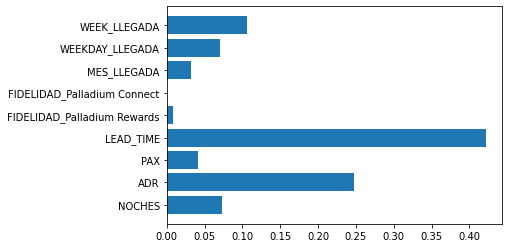

In [ ]:
plt.barh(feature_names, rf.feature_importances_)

In [ ]:
  rf = RandomForestClassifier(n_estimators = 100, max_depth=	20).fit(X_train, y_train)
  y_pred = rf.predict_proba(X_train)[:, 1]
  y_pred_val = rf.predict_proba(X_test)[:, 1]

NameError: ignored

In [ ]:
  auc_train = roc_auc_score(y_train, y_pred)
  auc_val = roc_auc_score(y_test, y_pred_val)
  print(auc_train, auc_val)

NameError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


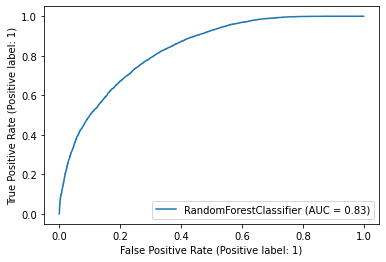

In [ ]:
sklearn.metrics.plot_roc_curve(rf, x_val, y_val)